# Data Cleaning

In [2]:
import pandas as pd
import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [3]:
df = pd.read_csv(r"..\data\reviews_data.csv")
df.tail

<bound method NDFrame.tail of                                                 reviews Recommended
0     ✅ Trip Verified |  I was flying to Warsaw for ...          no
1     ✅ Trip Verified |  Booked a BA holiday to Marr...         yes
2     ✅ Trip Verified | Extremely sub-par service. H...          no
3     ✅ Trip Verified |  I virtually gave up on Brit...         yes
4     ✅ Trip Verified |  I was pleasantly surprised ...         yes
...                                                 ...         ...
3422  Flight from Heathrow to Toronto. Booked emerge...         yes
3423  LHR to HAM. Purser addresses all club passenge...         yes
3424  My son who had worked for British Airways urge...         yes
3425  London City-New York JFK via Shannon on A318 b...          no
3426  SIN-LHR BA12 B747-436 First Class. Old aircraf...          no

[3427 rows x 2 columns]>

In [4]:
#Adding a column to df for verified travels
verified = []
for text in df["reviews"]:
    if re.search("Trip Verified", text):
        verified.append("yes")
    elif re.search("Not Verified", text):
        verified.append("no")
    else:
        # If the reviews has no label I assume that is not verified
        verified.append("no")

In [5]:
# Adding a new column to our DataFrame for verified flights
df["Verified"] = verified

In [6]:
df.head()

,reviews,Recommended,Verified
0,✅ Trip Verified | I was flying to Warsaw for ...,no,yes
1,✅ Trip Verified | Booked a BA holiday to Marr...,yes,yes
2,✅ Trip Verified | Extremely sub-par service. H...,no,yes
3,✅ Trip Verified | I virtually gave up on Brit...,yes,yes
4,✅ Trip Verified | I was pleasantly surprised ...,yes,yes


In [7]:
# Rearranging columns and copying the DataFrame
df_copy = df.reindex(columns = ["Verified", "reviews", "Recommended"])

In [8]:
# Renaming columns
df_copy.columns = ["Verified", "Reviews", "Recommended"]

In [9]:
df_copy.head()

,Verified,Reviews,Recommended
0,yes,✅ Trip Verified | I was flying to Warsaw for ...,no
1,yes,✅ Trip Verified | Booked a BA holiday to Marr...,yes
2,yes,✅ Trip Verified | Extremely sub-par service. H...,no
3,yes,✅ Trip Verified | I virtually gave up on Brit...,yes
4,yes,✅ Trip Verified | I was pleasantly surprised ...,yes


In [10]:
df_copy["Reviews"] = df_copy["Reviews"].str.replace("Trip Verified \|", " ")


C:\Users\dinil\AppData\Local\Temp\ipykernel_12872\226076564.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy["Reviews"] = df_copy["Reviews"].str.replace("Trip Verified \|", " ")


In [11]:
df_copy["Reviews"] = df_copy["Reviews"].str.replace("Not Verified \|", " ")

C:\Users\dinil\AppData\Local\Temp\ipykernel_12872\2033356952.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy["Reviews"] = df_copy["Reviews"].str.replace("Not Verified \|", " ")


In [12]:
df_copy.head(30)

,Verified,Reviews,Recommended
0,yes,✅ I was flying to Warsaw for one day of mee...,no
1,yes,"✅ Booked a BA holiday to Marrakech, after p...",yes
2,yes,✅ Extremely sub-par service. Highlights: No ...,no
3,yes,✅ I virtually gave up on British Airways ab...,yes
4,yes,✅ I was pleasantly surprised that the airli...,yes
5,yes,"✅ British Airways is late, their website is...",no
6,yes,✅ Flew from Amman to London on Nov. 14 2022....,no
7,yes,✅ This is the worst experience I have ever h...,no
8,yes,✅ Flying LHR T5 to CPT November 2022: BA a...,no
9,no,Worst experience ever. Outbound flight was c...,no


In [13]:
df_copy["Reviews"] = df_copy["Reviews"].str.replace("\|", " ")

C:\Users\dinil\AppData\Local\Temp\ipykernel_12872\751088409.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy["Reviews"] = df_copy["Reviews"].str.replace("\|", " ")


In [14]:
df_copy.head(30)

,Verified,Reviews,Recommended
0,yes,✅ I was flying to Warsaw for one day of mee...,no
1,yes,"✅ Booked a BA holiday to Marrakech, after p...",yes
2,yes,✅ Extremely sub-par service. Highlights: No ...,no
3,yes,✅ I virtually gave up on British Airways ab...,yes
4,yes,✅ I was pleasantly surprised that the airli...,yes
5,yes,"✅ British Airways is late, their website is...",no
6,yes,✅ Flew from Amman to London on Nov. 14 2022....,no
7,yes,✅ This is the worst experience I have ever h...,no
8,yes,✅ Flying LHR T5 to CPT November 2022: BA a...,no
9,no,Worst experience ever. Outbound flight was c...,no


In [15]:
df_copy["Reviews"] = df_copy["Reviews"].str.replace("\✅", " ")

C:\Users\dinil\AppData\Local\Temp\ipykernel_12872\3678149702.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy["Reviews"] = df_copy["Reviews"].str.replace("\✅", " ")


In [16]:
df_copy.to_csv(r"..\data\reviews_data1.csv", index = False)

In [17]:
# Formatting reviews for the analysis
# 1. Formatting all comments in lower case
rev_low =[]
for text in df_copy["Reviews"]:
    rev_low.append(text.lower())

In [18]:
df_copy["Reviews"] = rev_low

In [19]:
df_copy.to_csv(r"..\data\reviews_data1.csv", index = False)

In [20]:
text = df_copy["Reviews"][0]

Trying to prepare text content to further analysis.

In [21]:
# Remove punctuation.
text = re.sub("[^\w\s\d]", " ", text)

In [22]:
text

'     i was flying to warsaw for one day of meetings and would be flying back out to miami the next day  initially my flight was delayed in denver by 3 hours  as such i knew i would miss my connection in warsaw  the denver to heathrow flight was terrible  the plane was dirty  i was in economy  i usually fly business or premium economy but on this flight there was no availability  the plane was only about 2 3 full and the service was not good  my food was inedible and the seats very cramped although the middle seat was open so that made it tolerable  when i arrived in heathrow it was a complete circus  passengers everywhere trying to rebook missed connections  not only my flight but multiple other flights had missed connections  after waiting in line for an hour i was finally rebooked on another ba flight to warsaw  this plane was the smallest 3x3 plane i have seen  packed in like sardines  my bag never showed up so i had to cancel my meeting and now have no bag to fly back to miami  ba

In [23]:
nltk.download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dinil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
word_lemm = WordNetLemmatizer()


In [33]:
# Removing stopwords from reviews with label equal "no"
cleaned_rev = [[wd for wd in text.split() if wd not in stop_words] for text in df_copy["Reviews"][df_copy["Recommended"] == "no"]]


In [34]:
# Lemmatize text

content_lemm = [[word_lemm.lemmatize(wd, pos = "v") for wd in text] for text in cleaned_rev]
content_lemm1 = [[word_lemm.lemmatize(wd, pos = "n") for wd in text] for text in content_lemm]

In [35]:
content_lemm1[1]

['extremely',
 'sub-par',
 'service.',
 'highlights:',
 'online',
 'meal',
 'selection.',
 'staff',
 'pretty',
 'much',
 'drop',
 'whatever',
 'meal',
 'rude',
 'passenger',
 'want',
 'changed.',
 'last',
 'meal',
 'delay',
 'last',
 '40',
 'minute',
 'flight.',
 'plat',
 'literally',
 'grab',
 'away.',
 'hand',
 'unfinished',
 'plate',
 'staff',
 'drop',
 'me.',
 'apology.',
 'offer',
 'napkin.',
 'scrounge',
 'piece',
 'paper',
 'clean',
 'jacket.',
 'none',
 'passenger',
 'tell',
 'straighten',
 'seat',
 'meal.',
 'seat',
 'tilted,',
 'could',
 'barely',
 'keep',
 'plate',
 'tray',
 'without',
 'thing',
 'slip',
 'off.',
 'staff',
 'walk',
 'water',
 'biscuits.',
 'get',
 'exhaust',
 'get',
 'me.',
 'look',
 'walk',
 'away.',
 'nothing',
 'offered.']

In [36]:
from itertools import chain

df_text = pd.DataFrame({'col': content_lemm1})

content_words_list = list(chain.from_iterable(df_text.col.values))
content_words = ' '.join(content_words_list) 

# Bigrams
bgram = TextBlob(content_words).ngrams(2)
bgram[:1]

[WordList(['fly', 'warsaw'])]

In [37]:
word_dict = [' '.join(tup) for tup in list(bgram)]
print(len(word_dict))

vectorizer = CountVectorizer(ngram_range = (2, 2))
bag_of_words = vectorizer.fit_transform(word_dict)
sum_of_words = bag_of_words.sum(axis = 0)

word_freq = [(word, sum_of_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)


190405


In [38]:
word_freq

[('british airway', 1048),
 ('business class', 726),
 ('verify review', 541),
 ('check in', 462),
 ('cabin crew', 422),
 ('london heathrow', 387),
 ('customer service', 336),
 ('british airways', 295),
 ('fly ba', 242),
 ('premium economy', 212),
 ('first class', 202),
 ('long haul', 191),
 ('return flight', 186),
 ('hour flight', 185),
 ('fly british', 162),
 ('club europe', 150),
 ('club world', 139),
 ('via london', 132),
 ('review london', 129),
 ('leg room', 123),
 ('flight attendant', 122),
 ('low cost', 115),
 ('flight delay', 111),
 ('food drink', 105),
 ('economy class', 105),
 ('can not', 101),
 ('even though', 99),
 ('budget airline', 99),
 ('class seat', 97),
 ('entertainment system', 96),
 ('connect flight', 96),
 ('short haul', 93),
 ('take off', 92),
 ('ba flight', 91),
 ('inflight entertainment', 86),
 ('pay extra', 82),
 ('flight london', 79),
 ('in flight', 78),
 ('cabin staff', 76),
 ('next day', 74),
 ('haul flight', 74),
 ('flight time', 74),
 ('flight ba', 73),
 (

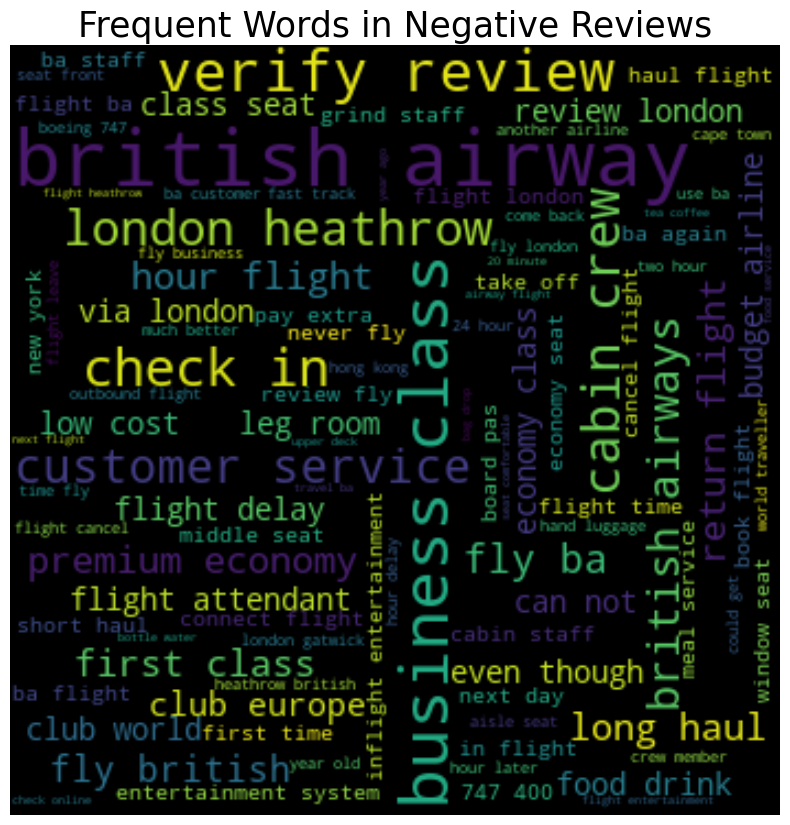

In [46]:
fig = plt.figure(figsize = (10, 10))
words_dict = dict(word_freq[:200])
wordcloud = WordCloud(max_words=100, height=350, width=350,stopwords=stop_words)
wordcloud.generate_from_frequencies(words_dict)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Frequent Words in Negative Reviews", fontsize = 25)
plt.savefig("wordcloud.png", transparent = True)
plt.show()
